In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

weather_in_london = pd.read_csv('E:/pandas/london.csv', parse_dates=['timestamp'])

%matplotlib inline

In [68]:
weather_in_london.shape

(17414, 10)

In [26]:
weather_in_london.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [28]:
weather_in_london.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [30]:
weather_in_london.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

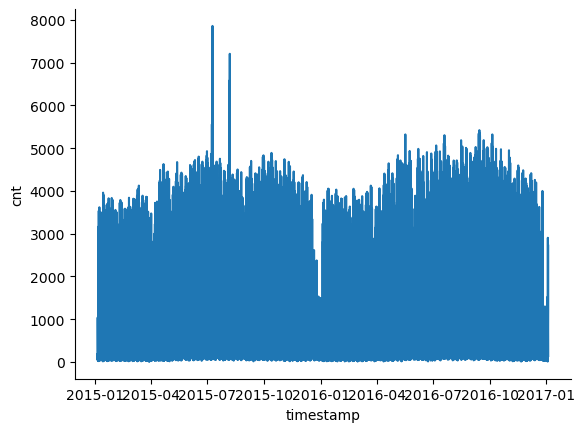

In [20]:
sns.lineplot(x = weather_in_london.timestamp, y = weather_in_london.cnt, data = weather_in_london)
sns.despine()

In [48]:
weather_in_london.reset_index(inplace=True)

In [50]:
weather_in_london

,index,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
17409,17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [52]:
weather_in_london.sort_values(by='timestamp', inplace=True)
weather_in_london.set_index('timestamp', drop = False, inplace = True)

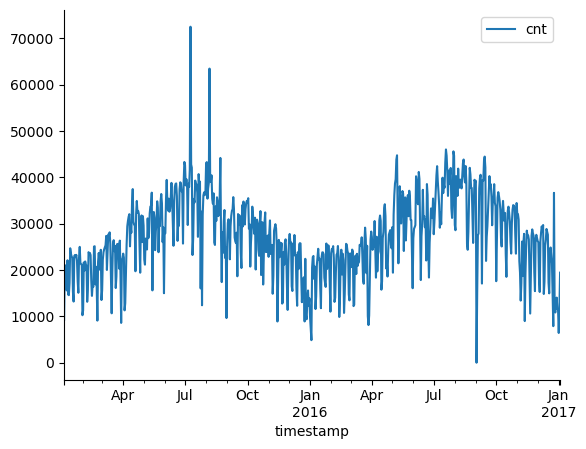

In [54]:
weather_in_london.resample('D').agg({'cnt':'sum'}).plot()
sns.despine()

In [56]:
by_day = weather_in_london.resample('D').cnt.sum().reset_index()
by_day.head(3)

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613


In [60]:
by_day_roll = weather_in_london.resample('D').cnt.sum().rolling(window=3).mean().reset_index()
by_day_roll.head()

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,16739.666667
3,2015-01-07,20683.000000
4,2015-01-08,19092.666667


In [64]:
by_day_roll.query("timestamp == @pd.to_datetime('2015-07-09')")

,timestamp,cnt
186,2015-07-09,50705.0


In [66]:
round(np.std(by_day['cnt'] - by_day_roll['cnt']), 2)

4558.59

In [70]:
std = np.std(by_day['cnt'] - by_day_roll['cnt'])
std

4558.586641117938

In [72]:
upper_bound = by_day_roll.cnt + (2.576 * std)
lower_bound = by_day_roll.cnt - (2.576 * std)

In [74]:
round(upper_bound.loc[730], 2)

24302.92

In [76]:
by_day['upper_bound'] = upper_bound
by_day['lower_bound'] = lower_bound
by_day.head()

,timestamp,cnt,upper_bound,lower_bound
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,28482.585854,4996.747479
3,2015-01-07,21064,32425.919188,8940.080812
4,2015-01-08,15601,30835.585854,7349.747479


In [78]:
by_day[by_day.cnt > by_day.upper_bound]

,timestamp,cnt,upper_bound,lower_bound
186,2015-07-09,72504,62447.919188,38962.080812
214,2015-08-06,63468,58370.252521,34884.414146
609,2016-09-04,27512,26001.919188,2516.080812
721,2016-12-25,36653,31393.585854,7907.747479


In [80]:
by_day[by_day.cnt < by_day.lower_bound]

,timestamp,cnt,upper_bound,lower_bound
130,2015-05-14,15609,40452.252521,16966.414146
189,2015-07-12,23240,47779.585854,24293.747479
201,2015-07-24,16034,42756.585854,19270.747479
232,2015-08-24,17400,41272.252521,17786.414146
314,2015-11-14,8898,32780.252521,9294.414146
607,2016-09-02,0,37829.252521,14343.414146
615,2016-09-10,17080,43004.919188,19519.080812
621,2016-09-16,21967,47936.252521,24450.414146
678,2016-11-12,8990,32620.919188,9135.080812
